In [1]:
from scipy import *
from matplotlib.pyplot import *
from numpy import *

1. Generate a vector with random numbers. Check all its elements and count the number of sign changes.

In [9]:
A = random.rand(11)


array([0.93912541, 0.40361359, 0.64432053, 0.39368738, 0.93758486,
       0.6917539 , 0.8442753 , 0.5397797 , 0.40172187, 0.50077065,
       0.25288212])

Random always reaturns in range $[0,1)$ so there are no sign changes to count.

2. write a function which takes an axis-label ('x', 'y', 'z') and an angle as input and returns a rotation matrix, e.g., `rot3D(2*pi,'x')` should return a 3D rotation matrix about the 'x'-axis.

In [18]:
def rot3D(theta, axis):
    if axis == 'x':
        return spatial.transform.Rotation.from_rotvec([theta, 0, 0]).as_matrix()
    elif axis == 'y':
        return spatial.transform.Rotation.from_rotvec([0, theta, 0]).as_matrix()
    elif axis == 'z':
        return spatial.transform.Rotation.from_rotvec([0, 0, theta]).as_matrix()

array([[ 1.0000000e+00,  2.4492936e-16,  0.0000000e+00],
       [-2.4492936e-16,  1.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  1.0000000e+00]])

3. Test if the product of three rotation matrices is orthogonal and has determinant 1


In [51]:
A = rot3D(4,'x')
B = rot3D(2,'y')
C = rot3D(1,'y')
D = A@B@C
print(linalg.det(D)- 1 < 1.e-8)
(transpose(D)@D-eye(3)  < 1.e-8).sum()>0


True


True

In [38]:
transpose(D)@D

array([[ 1.00000000e+00, -1.38777878e-17,  0.00000000e+00],
       [-1.38777878e-17,  1.00000000e+00, -2.97352443e-17],
       [ 0.00000000e+00, -2.97352443e-17,  1.00000000e+00]])

4. Compute the eigenvalues of this composed rotation matrix and plot them as small stars in the complex plane.

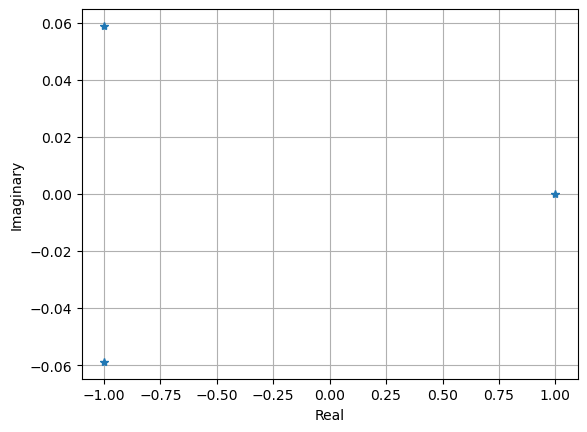

In [67]:
data = linalg.eigvals(D)
x = [ele.real for ele in data]
# extract imaginary part
y = [ele.imag for ele in data]
# plot the complex numbers
plot(x, y, marker="*",linewidth=0)
grid()
ylabel('Imaginary')
xlabel('Real')
show()